In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
import itertools
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

In [2]:
run_cv=False

In [3]:
df = pd.read_csv(r"/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/CREDIT CARD FRAUD/archive/creditcard.csv")
print (df.shape)

(284807, 31)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
temp=df.groupby('Time')['Class'].count()
temp.reset_index()
print(temp[temp>1].sort_values(ascending=False))
del temp

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
82382.0      2
82383.0      2
82388.0      2
82394.0      2
172788.0     2
Name: Class, Length: 79429, dtype: int64


In [8]:
df['Amount'].describe(percentiles=[.25,.50,.75,.90,.95,.99, .9999])

count     284807.000000
mean          88.349619
std          250.120109
min            0.000000
25%            5.600000
50%           22.000000
75%           77.165000
90%          203.000000
95%          365.000000
99%         1017.970000
99.99%      6483.961444
max        25691.160000
Name: Amount, dtype: float64

In [9]:
amt9999 = 6484
df99 = df.iloc[ list(df['Amount']<=amt9999) ]
df01 = df.iloc[ list(df['Amount']>amt9999) ]

In [10]:
import warnings
warnings.filterwarnings("ignore")

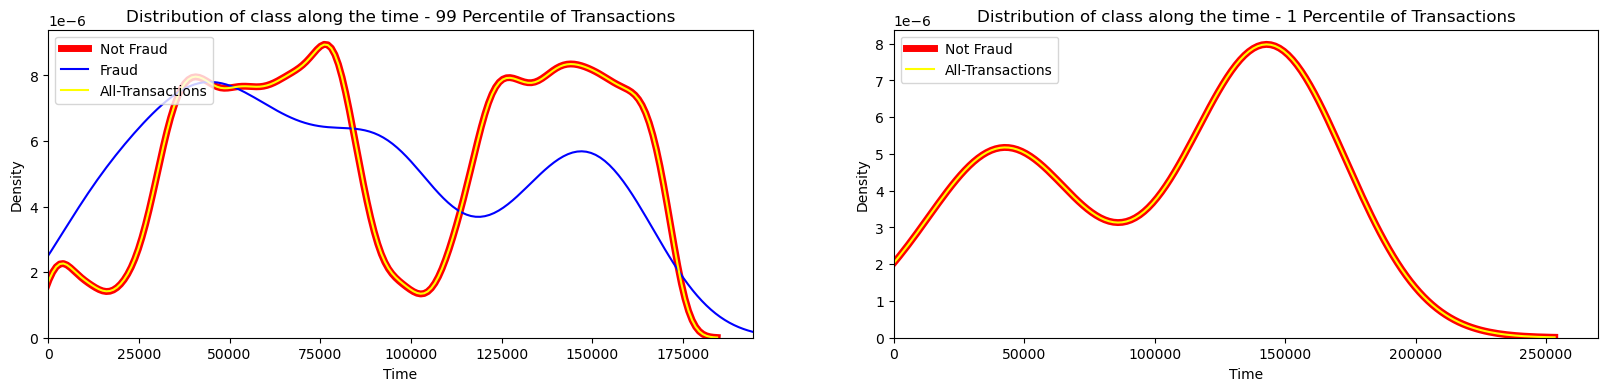

<Figure size 1000x500 with 0 Axes>

Duration  0.9615884579998237


In [11]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,4))
start=timer()
plt.figure(figsize=(10,5))
class_0 = df99.loc[df['Class'] == 0]["Time"]
class_1 = df99.loc[df['Class'] == 1]["Time"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud', color="red", ax=ax1, kde_kws=dict(linewidth=5)).set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud', ax=ax1, color="blue")
sns.distplot(df99.Time,hist=False,rug=False,label='All-Transactions', ax=ax1, color="yellow")
ax1.set_title   ("Distribution of class along the time - 99 Percentile of Transactions")
ax1.legend(loc='upper left')
class_0 = df01.loc[df['Class'] == 0]["Time"]
class_1 = df01.loc[df['Class'] == 1]["Time"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud', color="red", kde_kws=dict(linewidth=5), ax=ax2).set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud', color="blue", ax=ax2)
sns.distplot(df01.Time,hist=False,rug=False,label='All-Transactions', color="yellow", ax=ax2)
ax2.set_title ("Distribution of class along the time - 1 Percentile of Transactions")
ax2.legend(loc='upper left')
plt.show()

end = timer()
print("Duration ",end - start)


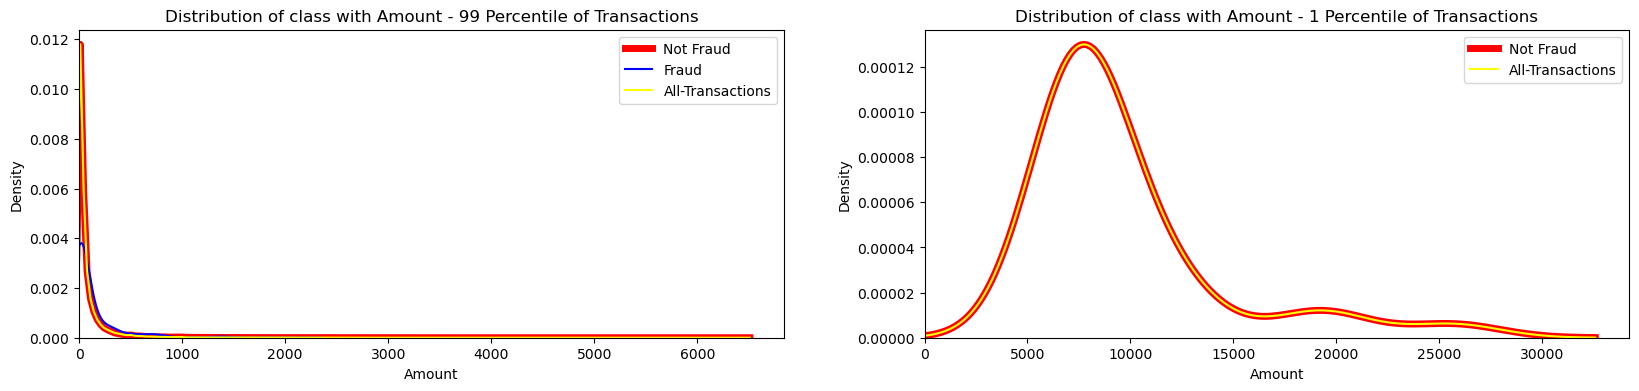

<Figure size 1000x500 with 0 Axes>

Duration  0.8346509579987469


In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,4))
start=timer()

plt.figure(figsize=(10,5))
class_0 = df99.loc[df['Class'] == 0]["Amount"]
class_1 = df99.loc[df['Class'] == 1]["Amount"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud', color="red", ax=ax1, kde_kws=dict(linewidth=5)).set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud', ax=ax1, color="blue")
sns.distplot(df99.Amount,hist=False,rug=False,label='All-Transactions', ax=ax1, color="yellow")
ax1.set_title   ("Distribution of class with Amount - 99 Percentile of Transactions")
ax1.legend(loc='upper right')

class_0 = df01.loc[df['Class'] == 0]["Amount"]
class_1 = df01.loc[df['Class'] == 1]["Amount"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud', color="red", kde_kws=dict(linewidth=5), ax=ax2).set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud', color="blue", ax=ax2)
sns.distplot(df01.Amount,hist=False,rug=False,label='All-Transactions', color="yellow", ax=ax2)
ax2.set_title ("Distribution of class with Amount - 1 Percentile of Transactions")
ax2.legend(loc='upper right')

plt.show()

end = timer()
print("Duration ",end - start)

In [13]:
max_amount=int(round(max(df.Amount) *1.04,-3))
bins=list(range(0,1601,100))
bins.append(max_amount)
df['Amt']=pd.cut(df.Amount,bins)

In [14]:
all_trans = df.pivot_table(index="Amt",columns="Class",values="V1",aggfunc=len) 
all_trans['All'] = all_trans[0] +all_trans[1]
all_trans = all_trans.drop( 0, axis=1)
all_trans.columns=['Fraud','All']
all_trans['Fraud %'] = all_trans['Fraud']  / len( df[df.Class==1])*100
all_trans['All %'] = all_trans['All']  / len( df.Class)*100
all_trans

,Fraud,All,Fraud %,All %
Amt,,,,
"(0, 100]",335.0,226474.0,68.089431,79.518411
"(100, 200]",45.0,27671.0,9.146341,9.715702
"(200, 300]",22.0,10776.0,4.471545,3.783615
"(300, 400]",21.0,5537.0,4.268293,1.944124
"(400, 500]",7.0,3382.0,1.422764,1.187471
"(500, 600]",7.0,2155.0,1.422764,0.756653
"(600, 700]",5.0,1435.0,1.016260,0.503850
"(700, 800]",9.0,1081.0,1.829268,0.379555
"(800, 900]",3.0,823.0,0.609756,0.288968


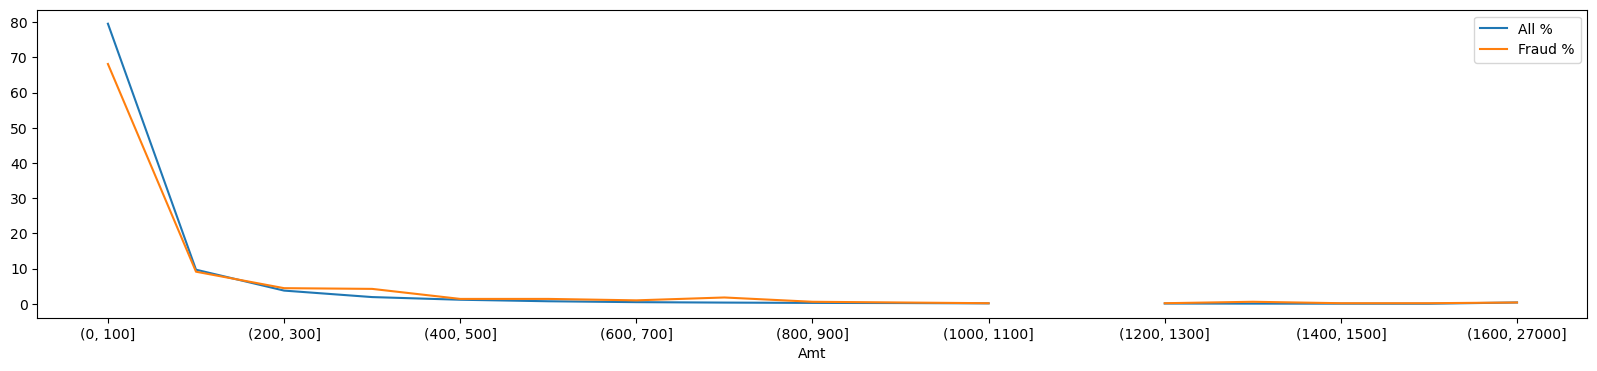

In [15]:
all_trans[['All %','Fraud %']].plot(figsize=(20, 4))
plt.show()

Duration  10.182581957998991


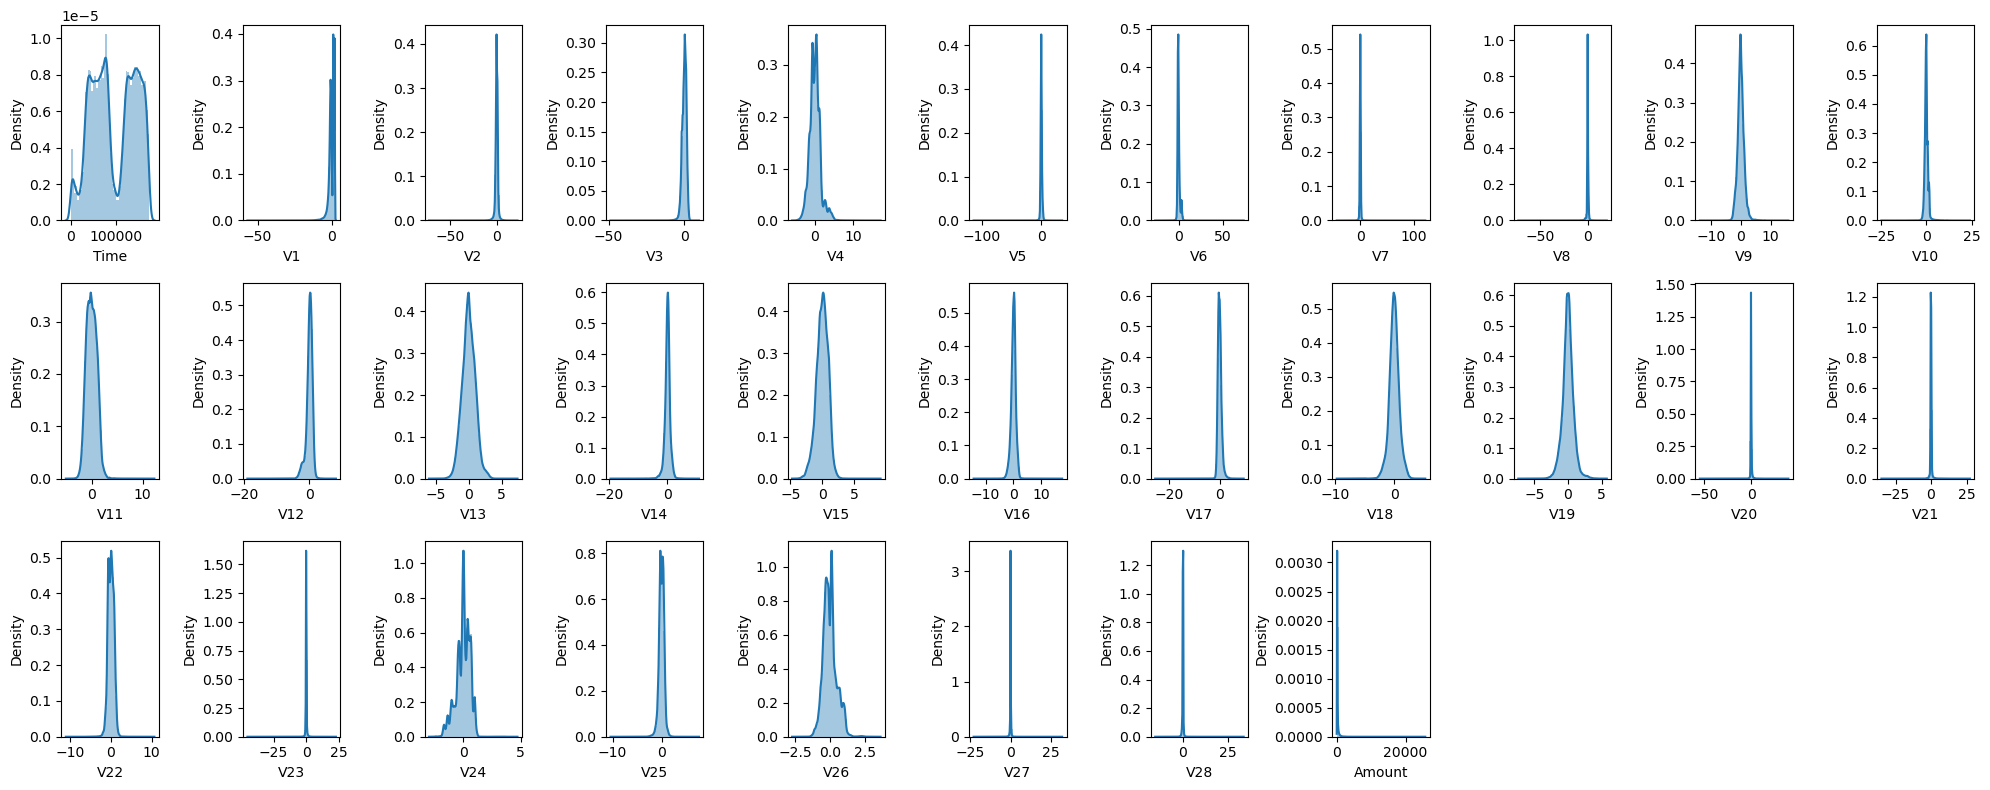

In [16]:
start = timer()
#Distribution of the data
plt.figure(figsize=(20,8))
i=1
for col in df.columns[0:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

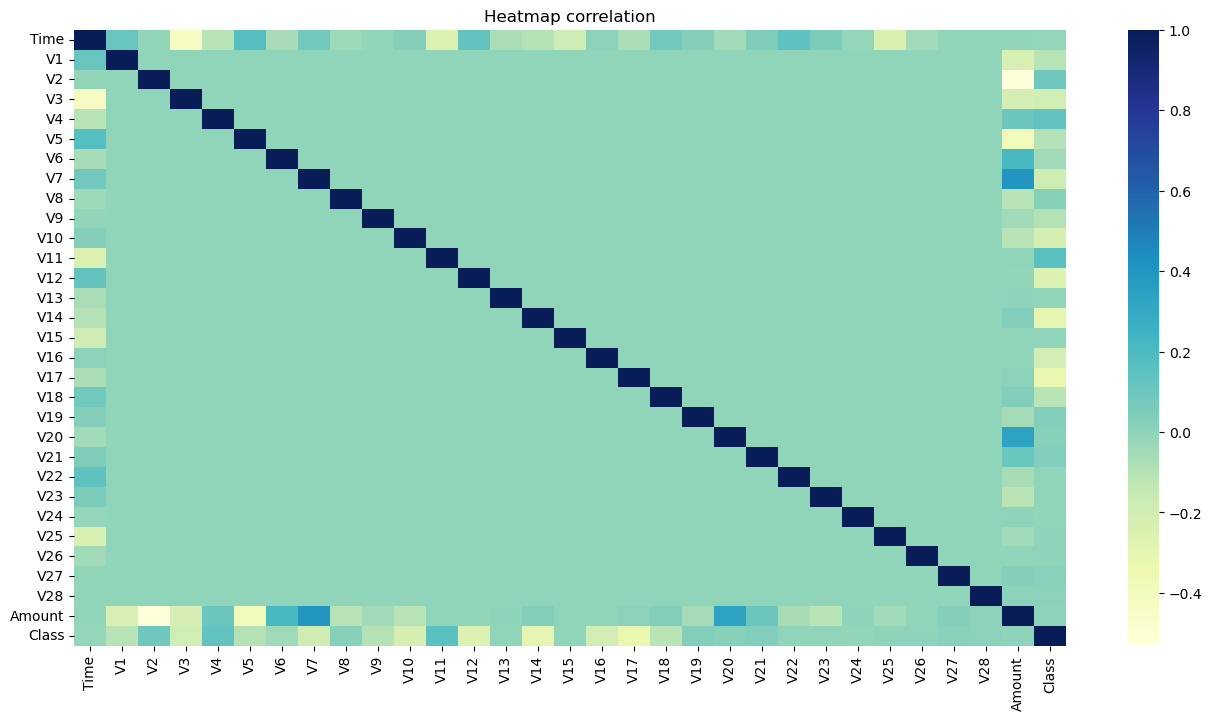

In [17]:
df_corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap="YlGnBu") 
plt.title('Heatmap correlation')
plt.show()

In [18]:
rank = pd.DataFrame(df_corr['Class'])
rank['Relationship'] = rank.Class.apply(lambda x: "+" if x>0 else "-")
rank.Class=abs(rank.Class)
rank.rename(columns={"Class":"Degree of Relation with Class"}, inplace=True)
rank.sort_values("Degree of Relation with Class", ascending=False)

,Degree of Relation with Class,Relationship
Class,1.000000,+
V17,0.326481,-
V14,0.302544,-
V12,0.260593,-
V10,0.216883,-
V16,0.196539,-
V3,0.192961,-
V7,0.187257,-
V11,0.154876,+
V4,0.133447,+


In [19]:
df.drop(columns="Amt", inplace=True)

In [20]:
df = pd.concat([ df.sample(frac=.05, random_state=1),df.loc[df.Class==1] ])
print (df.shape)

(14732, 31)


Duration  0.43751583300036145


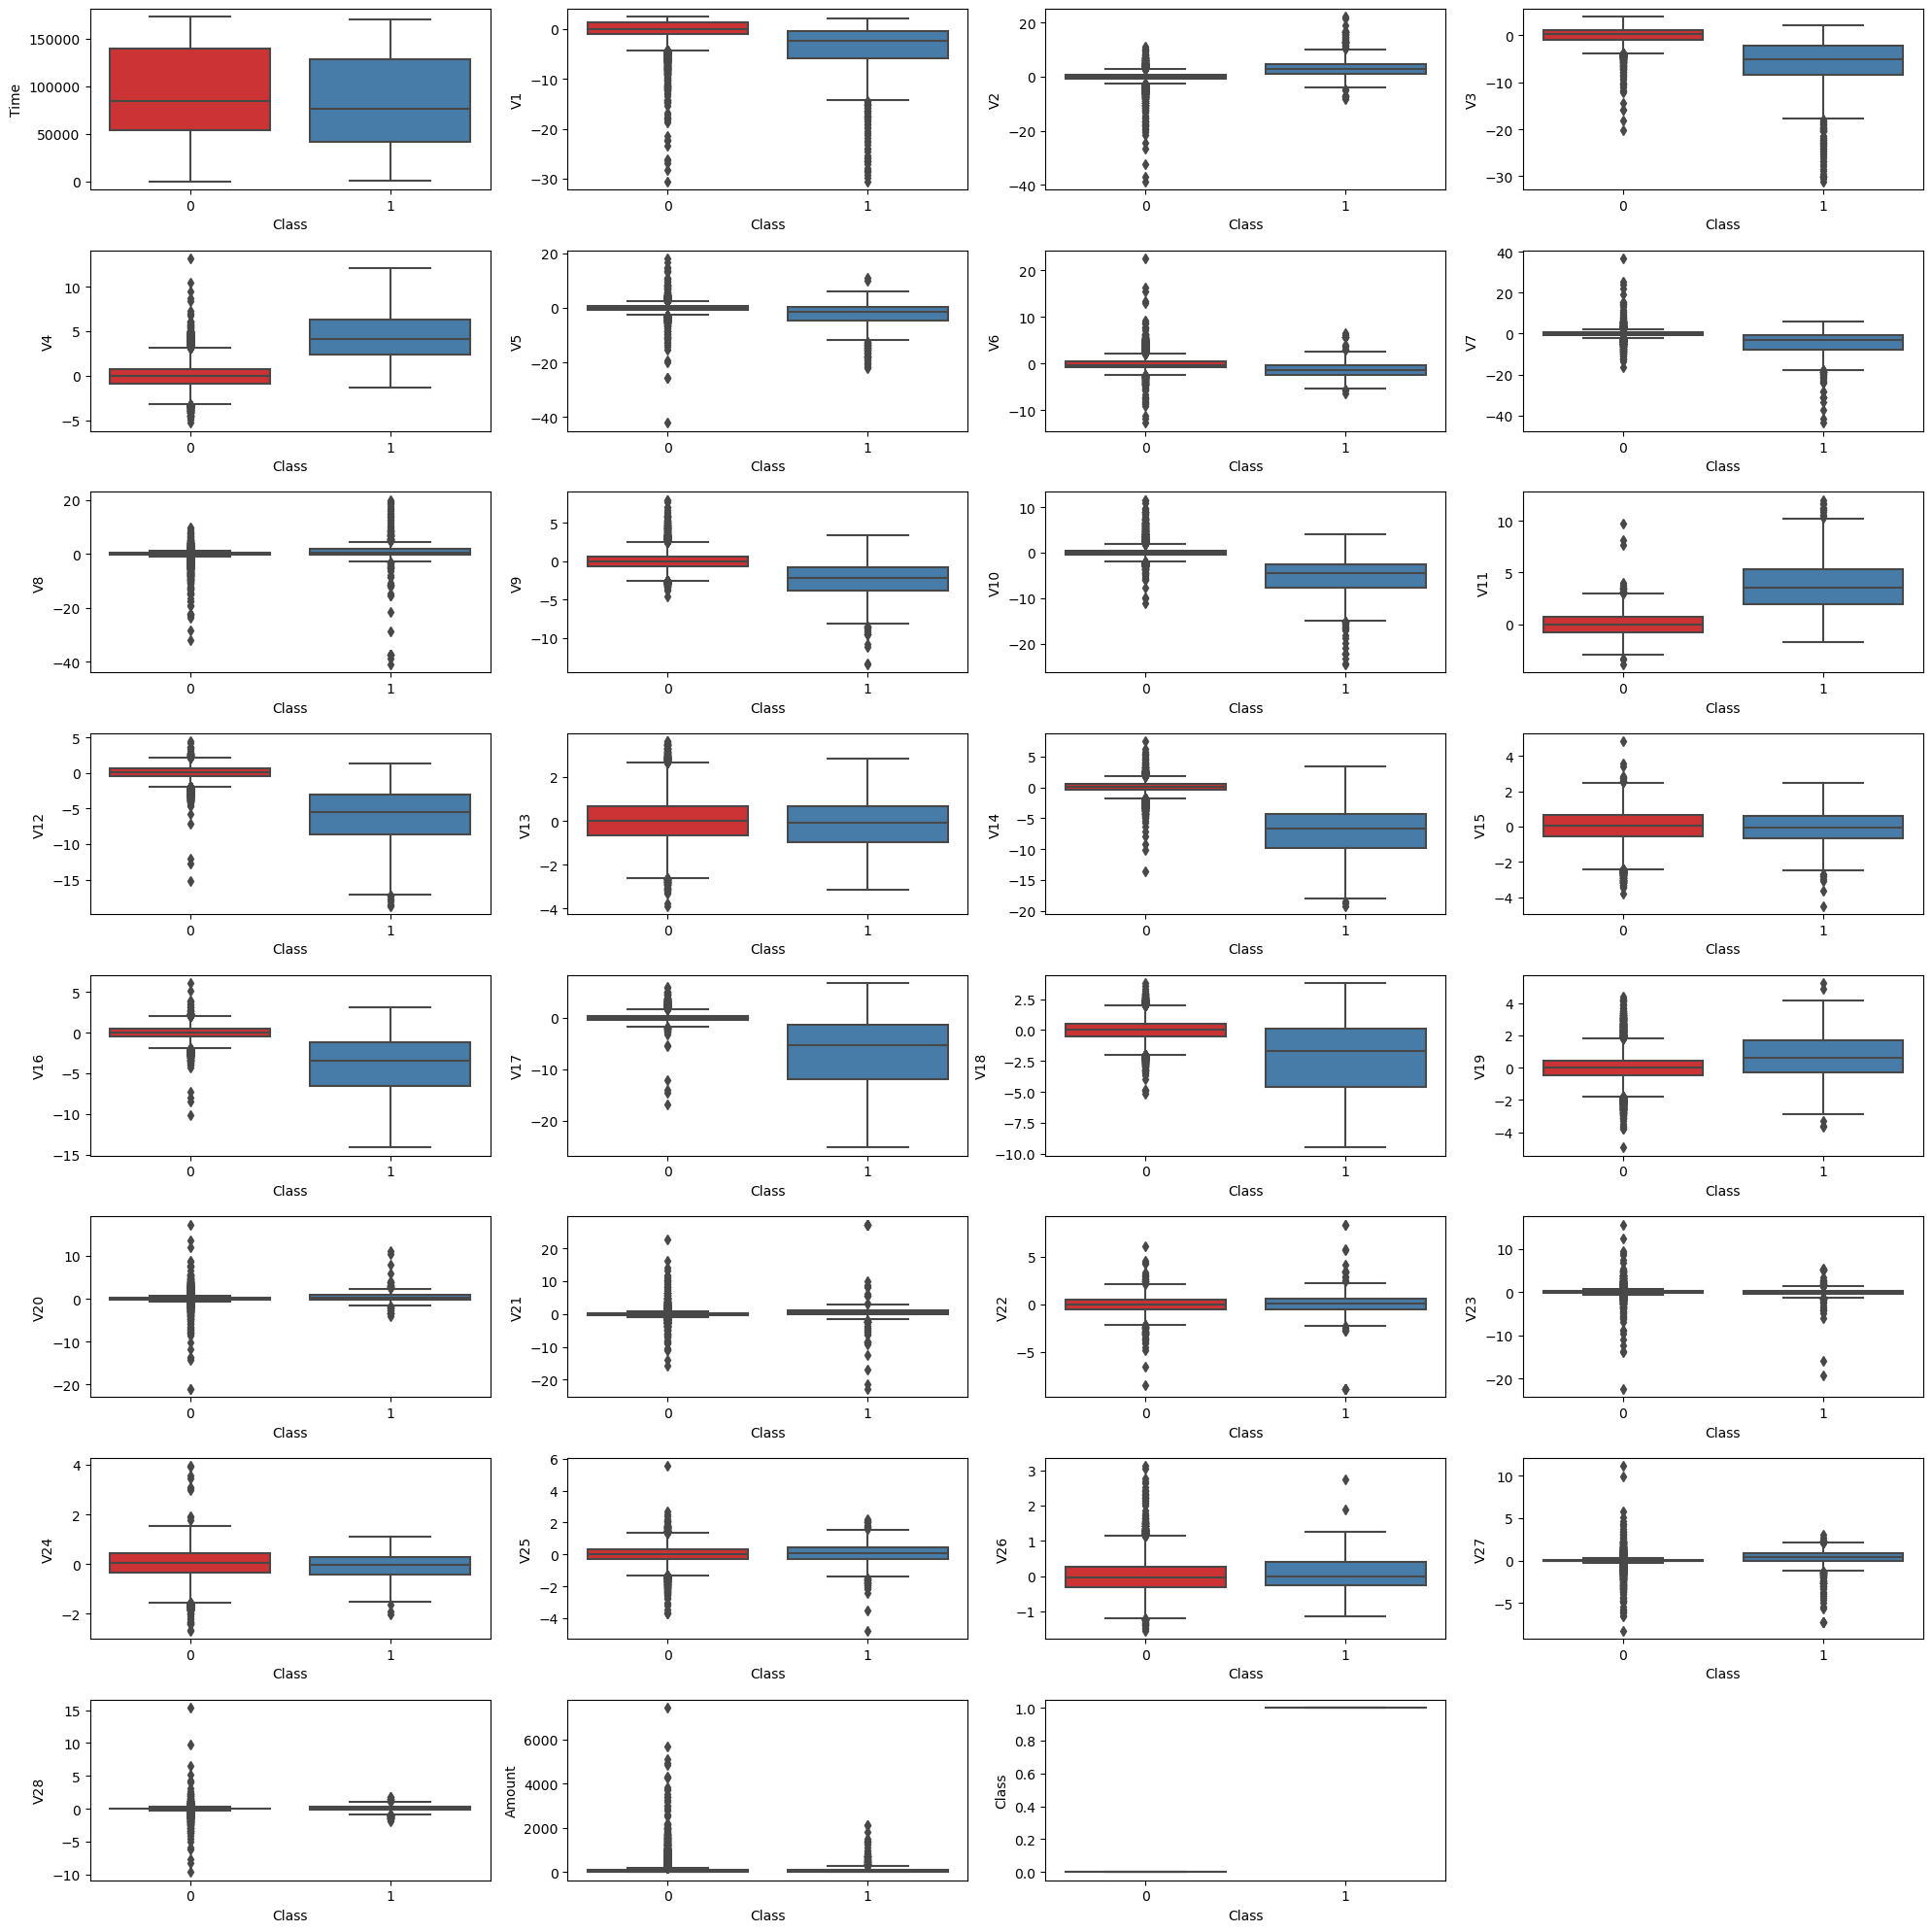

In [21]:
start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

In [ ]:
start=timer()

plt.figure(figsize=(20,80))
i=1
for col in df.columns:
    plt.subplot(16,2,i)
    
    sns.regplot(y=df[df.Class==0].Amount,x=df[df.Class==0][col], color="g")
    ax= sns.regplot(y=df[df.Class==1].Amount,x=df[df.Class==1][col], color="r")
    ax.tick_params(labelsize=15)
    ax.set_xlabel(col,fontsize=15)

    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

Duration  12.61832349999895


In [23]:
def split_data_normal(df):
    X= df.drop(columns=["Class"], axis=0)
    y= df.Class 

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)
    return (X_train1, X_test1, y_train1, y_test1)

def split_data_ros(X_train1, X_test1, y_train1, y_test1):
    ros = over_sampling.RandomOverSampler(random_state=100)
    X_train_ros, y_train_ros       = ros.fit_resample(X_train1, y_train1)
    X_test_ros,  y_test_ros        = (X_test1, y_test1)
    return (X_train_ros, X_test_ros, y_train_ros, y_test_ros)

def split_data_smote(X_train1, X_test1, y_train1, y_test1):
    smt = over_sampling.SMOTE(random_state=100)
    X_train_smote, y_train_smote   = smt.fit_resample(X_train1, y_train1)
    X_test_smote,  y_test_smote    = (X_test1, y_test1)
    return (X_train_smote, X_test_smote, y_train_smote, y_test_smote)

def split_data_adasyn(X_train1, X_test1, y_train1, y_test1):
    ada = over_sampling.ADASYN(random_state=100)
    X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
    X_test_adasyn,  y_test_adasyn  = (X_test1, y_test1)
    return (X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)

In [26]:
X_train1, X_test1, y_train1, y_test1  = split_data_normal(df)
X_train_ros, X_test_ros, y_train_ros, y_test_ros              = split_data_ros(X_train1, X_test1, y_train1, y_test1)
X_train_smote, X_test_smote, y_train_smote, y_test_smote      = split_data_smote(X_train1, X_test1, y_train1, y_test1)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn  = split_data_adasyn(X_train1, X_test1, y_train1, y_test1)

In [27]:
y_train1.value_counts(), y_test1.value_counts()

(0    10665
 1      384
 Name: Class, dtype: int64,
 0    3555
 1     128
 Name: Class, dtype: int64)

# RANDOM OVER SAMPLING

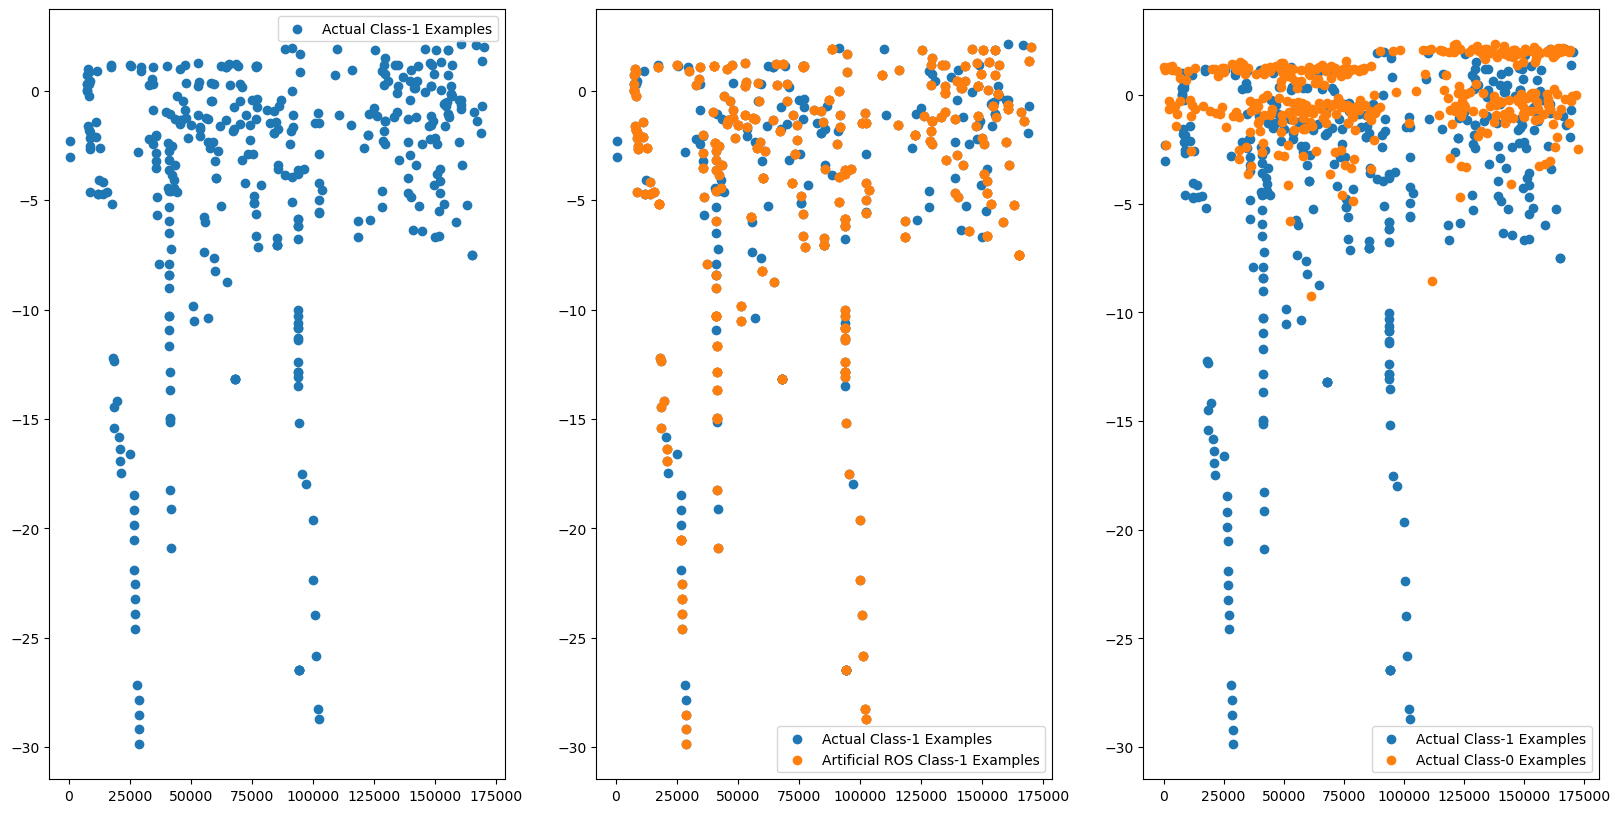

In [28]:
X_train_ros_1 = X_train_ros[X_train1.shape[0]:]
X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0], 0], 
            X_train_ros_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ROS Class-1 Examples')
plt.legend()
plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], 
            X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# SMOTE

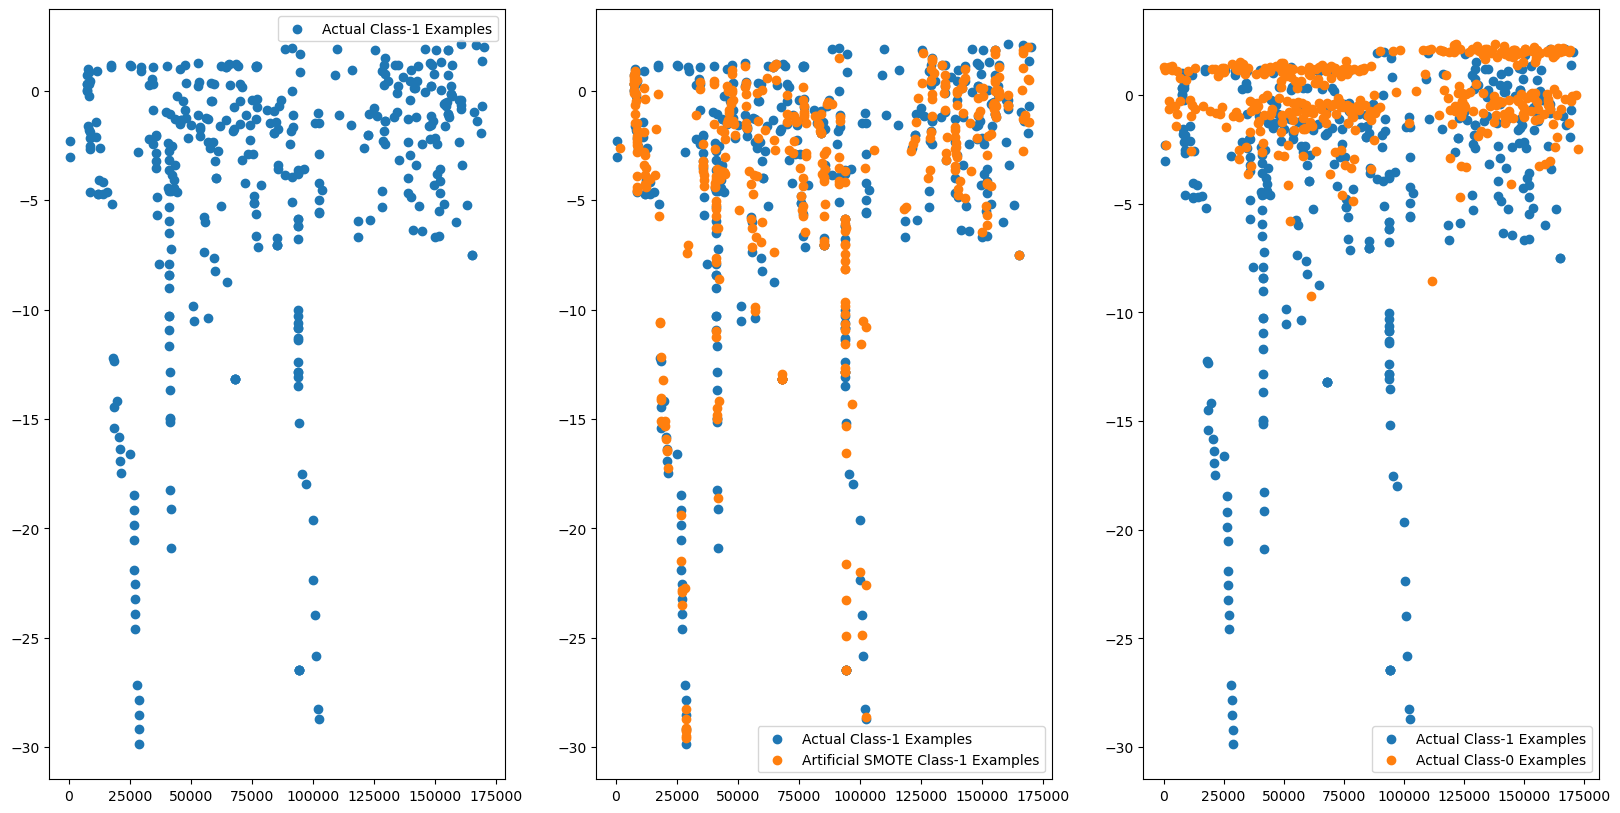

In [29]:
X_train_smote_1 = X_train_smote[X_train1.shape[0]:]
X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], 
            X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()
plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# ADASYN

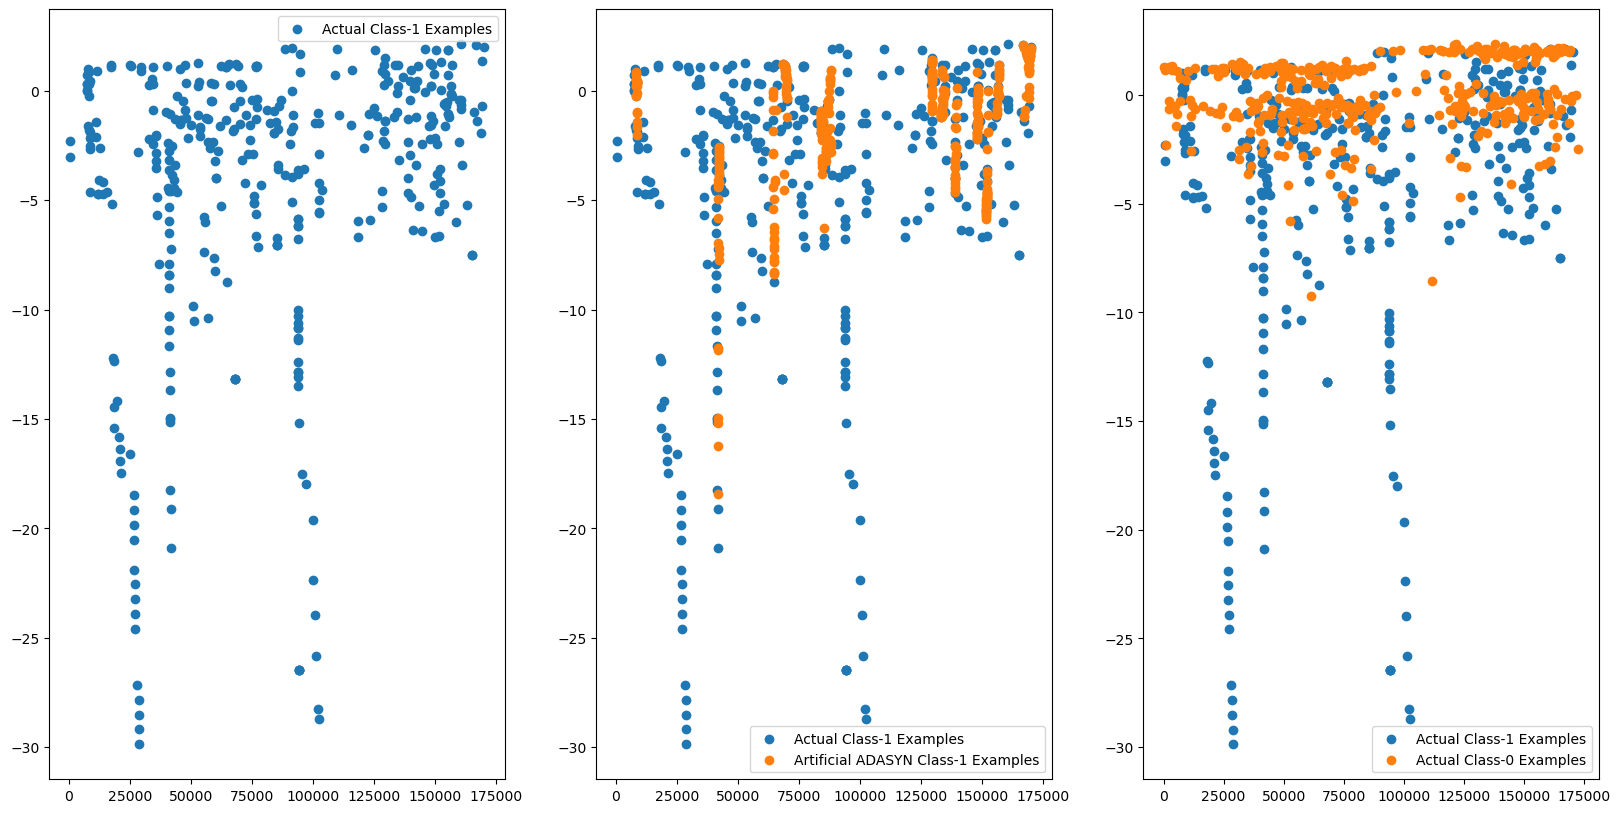

In [30]:
X_train_adasyn_1 = X_train_adasyn[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], 
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [31]:
model_with_data_list=['Normal','RandomOverSampler','Smote','AdaSyn']
def select_dataset(option=-1):
    if option==0:
        X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1
    elif option==1:
        X_train, X_test, y_train, y_test = X_train_ros, X_test_ros, y_train_ros , y_test_ros
    elif option==2:
        X_train, X_test, y_train, y_test = X_train_smote, X_test_smote, y_train_smote , y_test_smote
    elif option==3:
        X_train, X_test, y_train, y_test = X_train_adasyn, X_test_adasyn, y_train_adasyn , y_test_adasyn


    print ("\n\nRunning Model with **",model_with_data_list[option],"Data")
    
    print('Transaction Records in Train',len(y_train))
    print('Transaction Records in Test',len(y_test))
    print('Total Fraud Transaction Records',np.sum(y_train) + np.sum(y_test))
    print('Fraud Transaction Records in Train',np.sum(y_train))
    print('Fraud Transaction Records in Test',np.sum(y_test))
    
    return (X_train, X_test, y_train, y_test)

In [32]:

def draw_cv_results(cv_df, param_name, metric_name, title_name, log_true):
    plt.figure(figsize=(10,4))
    
    if log_true:
        x_axis= np.log10( list(cv_df[param_name]))
        x_axis_title = "Log Value "+param_name
    else:
        x_axis = list(cv_df[param_name])
        x_axis_title = param_name
        
    plt.plot( x_axis, cv_df['mean_train_score'] )
    plt.plot( x_axis, cv_df['mean_test_score'] )
    plt.xlabel(x_axis_title)
    plt.ylabel(metric_name)
    plt.title(title_name)
    plt.legend(['Train ' + metric_name +' score', 'Test ' +metric_name+' score'], loc='upper left')

In [33]:
def draw_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.tab10):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
   
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = 'd' 
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.fill(j,i,facecolor="red" if cm[i, j] < thresh else "blue", edgecolor='b', linewidth=2)
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, weight="bold", 
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white", 
                 
                bbox=dict(facecolor='red', alpha=0.8))
    plt.tight_layout()
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

In [35]:
class_names=[0,1]
def draw_roc( actual, probs, prob_values=True, Threshold_limit=0.5 ):
  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                          drop_intermediate = False )
    
    threshold = thresholds[np.argmax(tpr-fpr)]

    if prob_values:
        pred= probs.map(lambda x: 1 if x > threshold else 0)
    else:
        pred= probs
    auc_score = round( metrics.roc_auc_score( actual, probs) ,2)
    recall    = round( metrics.recall_score(actual,pred),2)
    precision = round(metrics.precision_score(actual, pred),2)
    f1= round(metrics.f1_score(actual,pred),2)
    print ("This Model Result is for ", model_with_data_list[option], " Data")
    print ("ROC AUC Score on Test:",auc_score," Threshold:{:.5f}".format(threshold))
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic example',fontsize=20)
    plt.legend(loc="lower right")
    plt.subplot(1,2,2)
    cm = confusion_matrix(actual, pred)
    draw_confusion_matrix(cm,class_names)
    plt.show()

    return auc_score,recall,precision,f1

# LOGISTIC REGRESSION

In [36]:
# Cross validation using different values of C. Let's check which value of C gives best result
def logistic_cv():
    start=timer()
    if run_cv:
        hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

        lr = LogisticRegression(max_iter=1000, random_state=100)
        lr.fit(X_train, y_train)      

        model_cv_logistic = GridSearchCV(estimator=lr, param_grid=hyper_params, \
                                cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
        model_cv_logistic.fit(X_train,  y_train)

        cv_results_lr = pd.DataFrame(model_cv_logistic.cv_results_)
        print(cv_results_lr)

    end = timer()
    print("Duration ",end - start)
    
    if run_cv:
        draw_cv_results(cv_results_lr, 'param_C', 'ROC AUC', 'Optimal C', True)
        
    if run_cv:
        model_cv_logistic.best_estimator_

In [60]:
#There are 29 variables in X_train. Let's see can we manage good result with lessor variables.




from sklearn.feature_selection import RFE

def logistic_with_rfe():
    if option == 0 or option == 1:
        lr = LogisticRegression(C=0.1, max_iter=1000, random_state=100)
    elif option == 2:
        lr = LogisticRegression(C=10, max_iter=1000, random_state=100)
    else:
        lr = LogisticRegression(C=100, max_iter=1000, random_state=100)

    rfe = RFE(estimator=lr, n_features_to_select=15)  # Fix the RFE constructor here
    rfe.fit(X_train, y_train)
    useful_cols = X_train.columns[rfe.support_]
    print('Important Variables Identified in RFE')
    print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
    return useful_cols


In [48]:
def logistic():
    useful_cols = logistic_with_rfe()
    X_train_= X_train[useful_cols]
    X_test_ = X_test[useful_cols]
    lr = LogisticRegression(C=.1,max_iter=1000, random_state=100)
    lr.fit(X_train_,y_train)
    y_test_pred_logistic = lr.predict_proba(X_test_)
    y_test_pred_logistic = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_logistic[:,1:2].reshape(-1) })
    logistic_auc_test, logistic_recall_test, logistic_precision_test, logistic_f1_test = \
                            draw_roc(y_test_pred_logistic.Class, y_test_pred_logistic.Class_Prob, True)
    return (logistic_auc_test, logistic_recall_test, logistic_precision_test, logistic_f1_test)

# SUPPORT VECTOR MACHINE

In [49]:
#hyper_params=[{'C': range(1,30,1) }]
def svc_cv():
    start=timer()
    if run_cv:
        hyper_params=[{'C': range(10,30,2) }]
        svmc = SVC(random_state = 100)
        model_cv_svm = GridSearchCV(estimator=svmc, param_grid=hyper_params,
                                cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
        model_cv_svm.fit(X_train,  y_train)
        cv_results_svm = pd.DataFrame(model_cv_svm.cv_results_)
        cv_results_svm.sort_values('rank_test_score')
    end = timer()
    print("Duration ",end - start)
    if run_cv:
        draw_cv_results(cv_results_svm, 'param_C', 'ROC AUC', 'Optimal n_estimator', False)
    if run_cv:
        print(model_cv_svm.best_estimator_)

In [50]:
#Optimized Hyper Parameters
def svc():
    svmc = SVC(C=20.0,random_state=100, probability=True).fit(X_train,y_train)
    y_test_pred_svm = svmc.predict(X_test)
    y_test_pred_svm = svmc.predict_proba(X_test)[:,1:2]
    y_test_pred_svm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_svm.reshape(-1) })

    svm_auc_test, svm_recall_test, svm_precision_test, svm_f1_test = \
                        draw_roc(y_test_pred_svm.Class, y_test_pred_svm.Class_Prob, True)
    
    return (svm_auc_test, svm_recall_test, svm_precision_test, svm_f1_test)

In [51]:
models_cv =['logistic','svc']
models =['logistic','svc']
models_name = ['Logistic Regression','SVC']

In [52]:
#Run Models
def run_all_models(option):
    for model_no in range(len(models)):
        model = models[model_no]
        print (f"Running Model {model}")
        auc_test, recall_test, precision_test, f1_test = globals()[model]()
        results.append([options[option],models_name[model_no],auc_test, recall_test, precision_test, f1_test])

In [53]:
global option, X_train, X_test, y_train, y_test
results=[]
options = ['Normal', 'RandomOverSampler', 'Smote', 'AdaSyn']



Running Model with ** Normal Data
Transaction Records in Train 11049
Transaction Records in Test 3683
Total Fraud Transaction Records 512
Fraud Transaction Records in Train 384
Fraud Transaction Records in Test 128
Running Model logistic
Important Variables Identified in RFE
[('Time', False, 16), ('V1', False, 6), ('V2', False, 8), ('V3', False, 3), ('V4', True, 1), ('V5', True, 1), ('V6', False, 4), ('V7', False, 12), ('V8', True, 1), ('V9', False, 7), ('V10', True, 1), ('V11', True, 1), ('V12', True, 1), ('V13', True, 1), ('V14', True, 1), ('V15', True, 1), ('V16', True, 1), ('V17', False, 13), ('V18', False, 14), ('V19', True, 1), ('V20', False, 9), ('V21', True, 1), ('V22', True, 1), ('V23', True, 1), ('V24', True, 1), ('V25', False, 5), ('V26', False, 10), ('V27', False, 11), ('V28', False, 2), ('Amount', False, 15)]
This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98  Threshold:0.05552


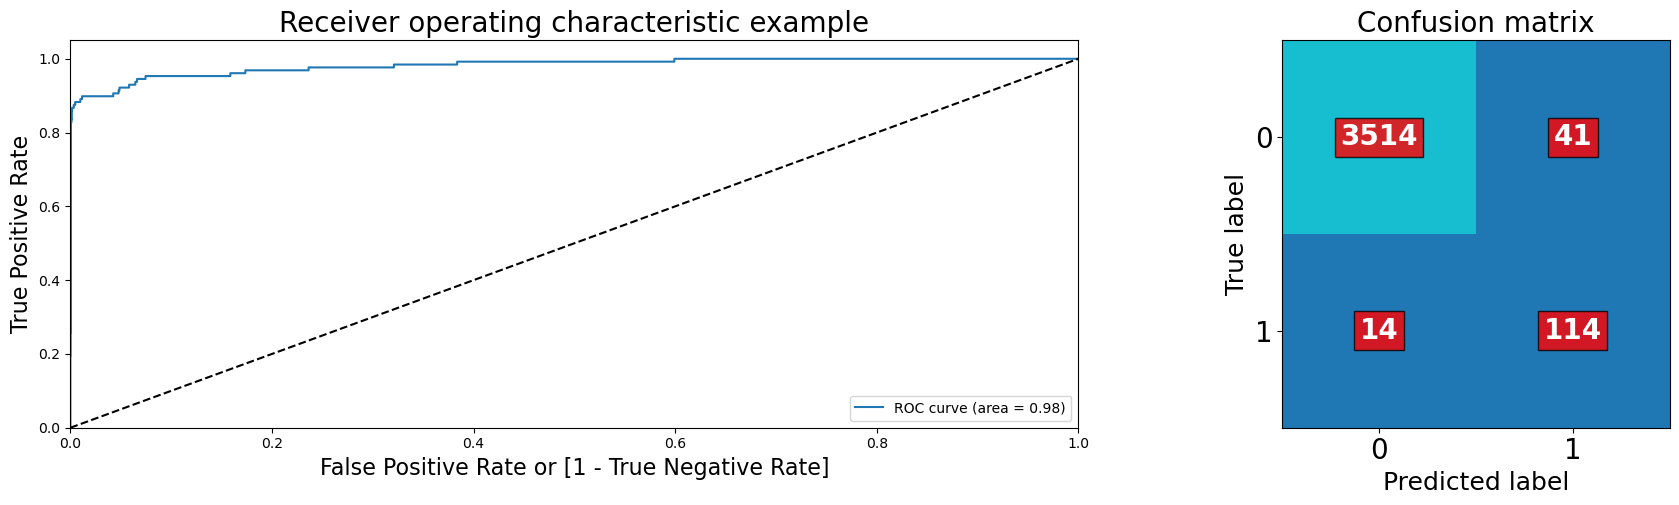

Running Model svc
This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.8  Threshold:0.02406


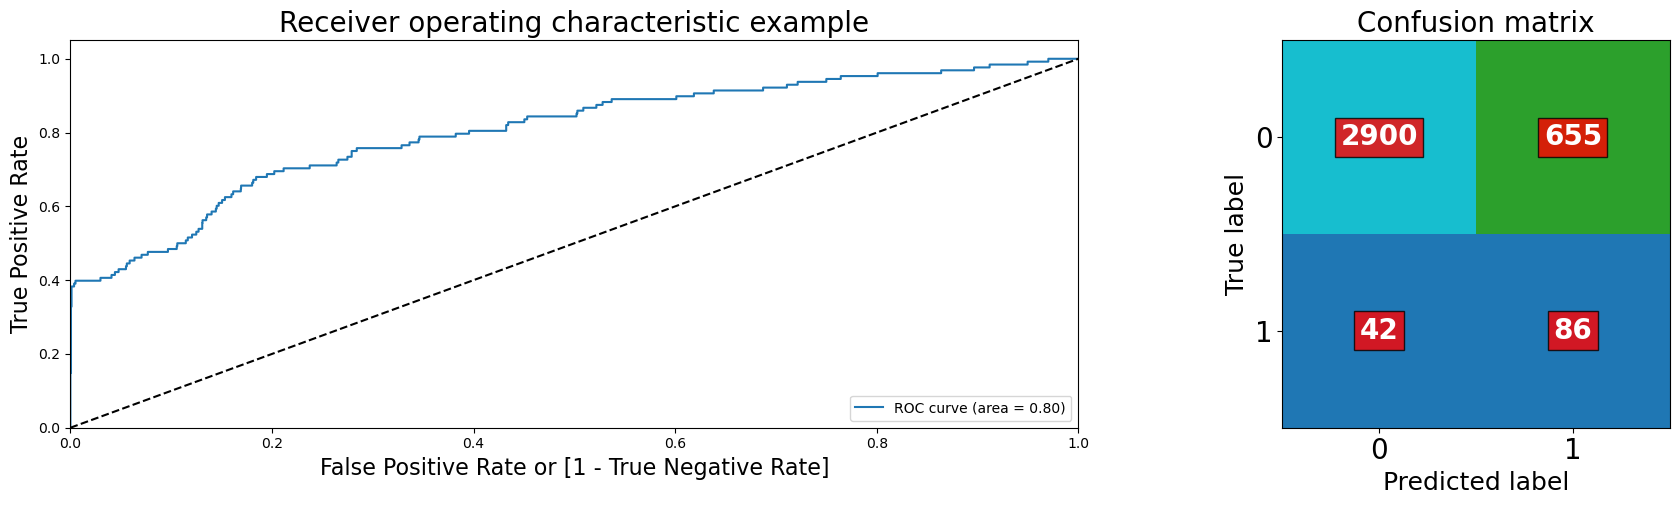

In [65]:
#options = ['0-Normal', '1-RandomOverSampler', '2-Smote', '3-AdaSyn']
option=0
X_train, X_test, y_train, y_test = select_dataset(option)
run_all_models(option)